In [17]:
import sys
import socket

sys.path.extend(['/home/jorg/repo/seg_uncertainty'])

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import torch
import os
import glob

from plotting.visualize_seg_det_results import plot_slices_per_phase

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ready


INFO - Successfully saved fig /home/jorg/expers/redo_expers/dcnn_mc_dice/figures/patient071/patient071_e_map_s0_9.pdf


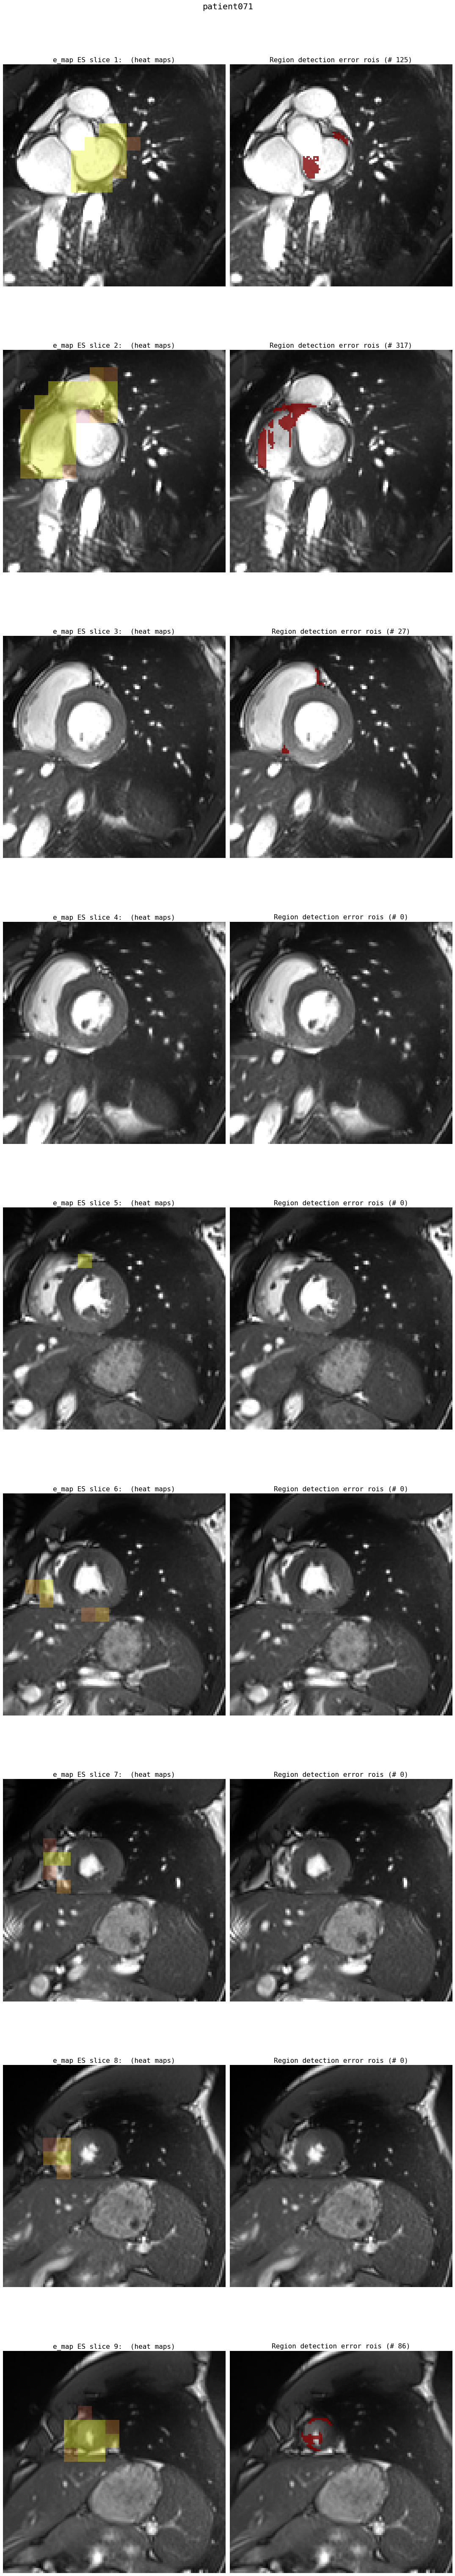

In [58]:
from datasets.ACDC.get_data import load_data

src_data_path = "~/expers/redo_expers/dcnn_mc_dice/"
cardiac_phase = "ES"
mc_dropout = False
do_crop = True
patient_id = "patient071"
data_to_load = ["pred_labels", "dt_labels", "ref_labels", "heat_maps", "images", "umaps"]
data_dict = load_data(src_data_path, cardiac_phase, data_to_load,
                              mc_dropout=mc_dropout, dt_config_id="fixed_46_31",
                              patient_id=patient_id, one_hot=False)
# [None, "ref", "error", "auto", "heat_map", "umap", "error_roi"]
right_column_overlay="error_roi" 
# [None, "ref", "error", "auto", "heat_map", "umap", "error_roi"]
left_column_overlay="heat_map"
plot_slices_per_phase(data_dict, patient_id, do_show=True, do_save=True, do_crop=True,
                      left_column_overlay=left_column_overlay, threshold=0.5,
                      alpha=0.4, cardiac_phase=cardiac_phase,
                      slice_range=[0, 9], 
                      type_of_map="b_map" if mc_dropout else "e_map" , 
                      right_column_overlay=right_column_overlay)